## Planejamento da solução (IOT)
IOT significa input, output e tasks

### Input (entrada)

1 - Problema de negócio  
 - Selecionar os clientes mais valiosos para integrar um programa de fidelização
    
2 - Coleta dos dados  
 - Vendas de um e-commerce durante o período de um ano

### Output (saída)

1 - A indicação das pessoas que farão parte do programa de Insiders
 - return: uma lista contendo o cliente e se está apto
 
 client | is_insider  
   123  |  yes/1  
   456  |  no/0
   
2 - Um relatório com as perguntas de negócio  
1. Quem são as pessoas elegíveis para participar do programa de Insiders ?  
2. Quantos clientes farão parte do grupo?  
3. Quais as principais características desses clientes ?  
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?  
5. Qual a expectativa de faturamento desse grupo para os próximos meses ?  
6. Quais as condições para uma pessoa ser elegível ao Insiders ?  
7. Quais as condições para uma pessoa ser removida do Insiders ?  
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?  
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?  

### Tasks (tarefas)

1. Quem são as pessoas elegíveis para participar do programa de Insiders ?  
 - O que é ser elegível? O que são clientes de maior valor?
 - Faturamento  
     - Alto ticket médio (média de compra)
     - Alto LTV (long time value) (soma dos gastos)
     - Baixa recência (tempo que ficou sem comprar)
     - Alto basket size (tamanho da sua cesta de compras)
     - Baixa probabilidade de churn
     - Alta previsão de LTV
     - Alta propensão de compra
 
 - Custo
     - Baixa taxa de devolução
     
 - Experiência de compra
     - Média alta de avaliação
     
2. Quantos clientes farão parte do grupo? 
 - Número total de clientes
 - Porcentagem do grupo insiders
 
3. Quais as principais características desses clientes ?  
 - Escrever características do cliente
     - Idade
     - Localização
     
 - Escrever características do consumo
     - Atributos da clusterização
     
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?  
 - Faturamento total do ano
 - Faturamento total dos insiders
 
5. Qual a expectativa de faturamento desse grupo para os próximos meses ? 
 - LTV do grupo insiders
 - Análise de cohort (Marcar uma pessoa no tempo e analisar)
 
6. Quais as condições para uma pessoa ser elegível ao Insiders ?  
 - Definir a periodicidade (1 mês, 3 meses)
 - A pessoa precisa ser similar ou parecida com uma do grupo
 
7. Quais as condições para uma pessoa ser removida do Insiders ?  
 - Definir a periodicidade (1 mês, 3 meses)
 - A pessoa precisa ser desimilar ou não parecida com uma do grupo
 
8. Qual a garantia que o programa Insiders é melhor que o restante da base ?  
 - Teste A/B
 - Teste A/B bayesiano
 - Teste de hipóteses
 
9. Quais ações o time de marketing pode realizar para aumentar o faturamento? 
 - Desconto
 - Preferência de compra
 - Frete
 - Visita na empresa

# 1 - Imports

In [102]:
import inflection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from dataprep.eda import create_report
from pycorrcat.pycorrcat import corr_matrix
from IPython.display import HTML
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import umap.umap_ as umap

## 1.1 - Funções

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    filterwarnings('ignore')
    
    #pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

# Função
def kde(var):
    '''Função para a seção 5.1.3 - Análise univariada da variável categórica'''
    aux = df4.sort_values(var)
    aux = aux[var].unique()
    for e in aux:
        sns.kdeplot(df5[df5[var] == e]['sales'], label=e, shade=True)
        plt.ticklabel_format(style='plain', axis='y')
        
# kde('store_type')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1.2 - Cargando os dados

In [3]:
df = pd.read_csv('../data/raw/Ecommerce.csv', encoding='latin-1')

# Deletar coluna extra
df.drop('Unnamed: 8', axis=1, inplace=True)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 2 - Descrição dos dados

In [5]:
df2 = df.copy()

## 2.1 - Dimensão do dataset

In [6]:
print(f'Quantidade de linhas: {df2.shape[0]}')
print(f'Quantidade de colunas: {df2.shape[1]}')

Quantidade de linhas: 541909
Quantidade de colunas: 8


## 2.2 - Renomear as colunas

In [7]:
old_cols = df2.columns

snakecase = lambda x:inflection.underscore(x)

new_cols = list(map(snakecase, old_cols))

df2.columns = new_cols

## 2.3 - Tipos dos dados

In [8]:
df2.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 2.4 - Dados nulos

In [9]:
df2.isnull().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 2.5 - Correção dados nulos

In [10]:
df_null = df2[df2['customer_id'].isnull()]
df_not_null = df2[~df2['customer_id'].isnull()]

In [11]:
df_not_null.shape

(406829, 8)

In [12]:
df_null.shape

(135080, 8)

In [13]:
invoice_null = df_null['invoice_no'].tolist()

In [14]:
# Verificar se há o mesmo invoice_no nos dataframe
df_not_null[df_not_null['invoice_no'].isin(invoice_null)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country


Não há o mesmo invoice_no em ambos os casos

In [15]:
df_backup = pd.DataFrame(df_null['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000, 19000 + len(df_backup))

# Merge
df2 = pd.merge(df2, df_backup, on='invoice_no', how='left')

# coalesce
df2['customer_id'] = df2['customer_id_x'].combine_first(df2['customer_id_y'])
df2.drop(['customer_id_x', 'customer_id_y'], axis=1, inplace=True)

In [16]:
df2.isnull().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

In [17]:
df2.shape

(541909, 8)

## 2.6 - Alteração dos tipos dos dados

In [18]:
# Invoice date
df2['invoice_date'] = pd.to_datetime(df2['invoice_date'], format='%d-%b-%y')

# Customer ID
df2['customer_id'] = df2['customer_id'].astype(int)

In [19]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


## 2.7 - Análise descritiva

In [20]:
num = df2.select_dtypes(include=['int64', 'float64'])
cat = df2.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 2.7.1 - Análise numérica

In [21]:
# média, desvio padrão, mínimo, quartis, máximo
desc = num.describe().T
desc.drop('count', axis=1, inplace=True)

# mediana
median = pd.DataFrame(num.apply(np.median))
desc.insert(2,'median', median[0].values)

# range
range_ = pd.DataFrame( num.apply( lambda x: x.max() - x.min() ) )
desc.insert(len(desc.columns),'range', range_[0].values)

# trocando o desvio padrão de posição
std = desc.pop('std')
desc.insert(len(desc.columns),'std', std)

# skewness
skew = pd.DataFrame(num.apply(lambda x: x.skew()))
desc.insert(len(desc.columns),'skew', skew[0].values)

# kurtosis
kurtosis = pd.DataFrame(num.apply(lambda x: x.kurtosis()))
desc.insert(len(desc.columns),'kurtosis', kurtosis[0].values)

# Remover 25%, 50% e 75%
desc.drop(['25%', '50%', '75%'], axis=1, inplace=True)

desc

,mean,median,min,max,range,std,skew,kurtosis
quantity,9.552250,3.00,-80995.00,80995.0,161990.00,218.081158,-0.264076,119769.160031
unit_price,4.611114,2.08,-11062.06,38970.0,50032.06,96.759853,186.506972,59005.719097
customer_id,16688.840453,16249.00,12346.00,22709.0,10363.00,2911.411352,0.487449,-0.804287


### 2.7.2 - Análise categórica

In [22]:
for x in cat.columns:
    print(f'- A coluna {x} tem {cat[x].unique().shape[0]} valores únicos: {cat[x].unique()}')

- A coluna invoice_no tem 25900 valores únicos: ['536365' '536366' '536367' ... '581585' '581586' '581587']
- A coluna stock_code tem 4070 valores únicos: ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
- A coluna description tem 4224 valores únicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
- A coluna country tem 38 valores únicos: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


#### invoice_no

In [23]:
cat['invoice_no'].value_counts().head()

573585    1114
581219     749
581492     731
580729     721
558475     705
Name: invoice_no, dtype: int64

In [24]:
df_invoice_cat = df2.loc[df2['invoice_no'].apply(lambda x: bool(re.search( '[^0-9]+', x))), :]
df_invoice_cat.head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2016-11-29,0.29,United Kingdom,17548
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2016-11-29,3.45,United Kingdom,17548
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2016-11-29,1.65,United Kingdom,17548
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2016-11-29,1.65,United Kingdom,17548
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2016-11-29,4.25,United Kingdom,17897


In [25]:
len(df_invoice_cat)

9291

In [26]:
len(df_invoice_cat[df_invoice_cat['quantity'] < 0 ])

9288

<b>Os invoices_no com a letra "C" na frente, possuem quantidades negativas</b>

In [27]:
df_invoice_num = df2.loc[df2['invoice_no'].apply(lambda x: bool(re.search('[0-9]+', x))), :]
df_invoice_num.head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2016-11-29,7.65,United Kingdom,17850
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2016-11-29,4.25,United Kingdom,17850
7,536366,22633,HAND WARMER UNION JACK,6,2016-11-29,1.85,United Kingdom,17850
8,536366,22632,HAND WARMER RED POLKA DOT,6,2016-11-29,1.85,United Kingdom,17850
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2016-11-29,1.69,United Kingdom,13047


In [28]:
len(df_invoice_num)

541909

#### stock_code

In [29]:
# Stock code com letras e números
df2.loc[df2['stock_code'].apply(lambda x: bool(re.search('[A-Z]$', x))), :].head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850
45,536370,POST,POSTAGE,3,2016-11-29,18.00,France,12583
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
51,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
60,536373,82494L,WOODEN FRAME ANTIQUE WHITE,6,2016-11-29,2.55,United Kingdom,17850
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
62,536373,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [30]:
# Stock code apenas com letras
df2.loc[df2['stock_code'].apply(lambda x: bool(re.search( '^[a-zA-Z]+$', x))), 'stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [31]:
# Stock code apeans com números
df2.loc[df2['stock_code'].apply(lambda x: bool(re.search('[^a-zA-Z]$', x))), :].head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2016-11-29,7.65,United Kingdom,17850
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2016-11-29,4.25,United Kingdom,17850
7,536366,22633,HAND WARMER UNION JACK,6,2016-11-29,1.85,United Kingdom,17850
8,536366,22632,HAND WARMER RED POLKA DOT,6,2016-11-29,1.85,United Kingdom,17850
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2016-11-29,1.69,United Kingdom,13047
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2016-11-29,2.10,United Kingdom,13047
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2016-11-29,2.10,United Kingdom,13047
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2016-11-29,3.75,United Kingdom,13047
13,536367,22310,IVORY KNITTED MUG COSY,6,2016-11-29,1.65,United Kingdom,13047


#### description

#### country

In [32]:
# Base total
cat['country'].value_counts().head()

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: country, dtype: int64

In [33]:
# base total
cat['country'].value_counts(normalize=True).head()

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: country, dtype: float64

In [34]:
# Sem country e customer_id duplicados
aux = df2[['country', 'customer_id']].drop_duplicates()
aux.groupby('country', as_index=False)['customer_id'].count().sort_values('customer_id', ascending=False).head()

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31


In [35]:
# Sem country e customer_id duplicados
aux['country'].value_counts(normalize=True).head()

United Kingdom    0.937824
Germany           0.011743
France            0.011125
EIRE              0.005439
Spain             0.003832
Name: country, dtype: float64

### 2.7.3 - Análise temporal

In [36]:
old = df2['invoice_date'].min()
new = df2['invoice_date'].max()
print(f'A data mais antiga: {old}')
print(f'A data mais atual: {new}')

A data mais antiga: 2016-11-29 00:00:00
A data mais atual: 2017-12-07 00:00:00


# 3 - Filtragem das variáveis

In [187]:
df3 = df2.copy()

In [188]:
# Valores acima de 0 centavos
df3 = df3[df3['unit_price'] >= 0.04]

# Removendo linhas que não são ID de produtos no stock_code
df3 = df3[~df3['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'])]

# Excluindo a coluna description
df3.drop('description', axis=1, inplace=True)

# Excluindo os países de união europeia e indefinido
df3 = df3[~df3['country'].isin(['European Community', 'Unspecified'])]

# Usuários ruins
df3 = df3[~df3['customer_id'].isin([16446])]

# Separando as quantidades negativas das positivas
df3_devolucao = df3[df2['quantity'] < 0]
df3_compra = df3[df2['quantity'] >= 0]

# 4 - Feature engineering

In [189]:
df4 = df3.copy()

## 4.1 - Mapa mental das hipóteses

## 4.2 - Criação das hipóteses

## 4.3 - Lista final das hipóteses

## 4.4 - Feature engineering

In [190]:
df_ref = df4.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)

### 4.4.1 - Gross Revenue

In [191]:
# Gross Revenue ( Faturamento ) quantity * price
df3_compra.loc[:, 'gross_revenue'] = df3_compra.loc[:, 'quantity'] * df3_compra.loc[:, 'unit_price']

# Monetary
df_monetary = df3_compra.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

### 4.4.2 - Recency - Dias da última compra

In [192]:
# Recency - Last day purchase (dia da última compra)
df_recency = df3_compra.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df3['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### 4.4.3 - Quantidade de compras

In [193]:
df_freq = df3_compra.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index().rename(columns={'invoice_no':'qtde_invoices'})
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
dtype: int64

### 4.4.4 - Quantidade de itens comprados

In [194]:
df_qtd = df3_compra.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename(columns={'quantity':'qtde_items'})
df_ref = pd.merge( df_ref, df_qtd, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
dtype: int64

### 4.4.4 - Quantidade de produtos comprados

In [195]:
df_qtd = df3_compra.loc[:, ['customer_id', 'stock_code']].drop_duplicates().groupby( 'customer_id' ).count().reset_index().rename(columns={'stock_code':'qtde_products'})
df_ref = pd.merge( df_ref, df_qtd, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
dtype: int64

### 4.4.5 - Ticket médio

In [196]:
 # Avg Ticket - Média do faturamento por cliente (ticket Médio)
df_avg_ticket = df3_compra.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
avg_ticket       91
dtype: int64

### 4.4.6 - Average Recency days (Média de dias da recencia)

In [197]:
df_aux = df3[['customer_id', 'invoice_date']].drop_duplicates().sort_values(['customer_id', 'invoice_date'])
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # Copia o costumer id da linha anterior
df_aux['previous_date'] = df_aux['invoice_date'].shift()# Copia o invoice date da linha anterior

df_aux['avg_recency_days'] = df_aux.apply(lambda x: (x['invoice_date'] - x['previous_date']).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1)

df_aux = df_aux.drop(['invoice_date', 'next_customer_id', 'previous_date'], axis=1).dropna()

# Média
df_avg_recency_days = df_aux.groupby('customer_id', as_index=False).mean()

# Merge
df_ref = pd.merge(df_ref, df_avg_recency_days, on='customer_id', how='left')

In [198]:
df_ref.isnull().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
dtype: int64

### 4.4.7 - Frequência de compra

In [199]:
df_freq = (df3_compra[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates().groupby('customer_id').agg(
                                                                                max_ = ('invoice_date', 'max'),
                                                                                min_ = ('invoice_date', 'max'),
                                                                                days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 1),
                                                                                buy_ = ('invoice_no', 'count'))).reset_index()
# Frequency
df_freq['frequency'] = df_freq[['buy_', 'days_']].apply(lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1)

# Merge
df_ref = pd.merge(df_ref, df_freq[['customer_id', 'frequency']], on='customer_id', how='left')

In [200]:
df_ref.isnull().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
dtype: int64

### 4.4.8 - Número de retorno

In [201]:
df_return = df3_devolucao.groupby('customer_id', as_index=False)['quantity'].sum().rename(columns={'quantity':'qtde_returns'})
df_return['qtde_returns'] *= -1 

df_ref = pd.merge(df_ref, df_return, how='left', on='customer_id')
df_ref.loc[df_ref['qtde_returns'].isnull(), 'qtde_returns'] = 0

In [202]:
df_ref.isnull().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
dtype: int64

### 4.4.9 - Basket case - Quantidade de itens por cesta
- Invoice no = Compra = Purchase
- Stock code = Porduto = Product
- Quantity = Item

In [203]:
df_aux = (df3_compra.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                        .agg(n_purchase=('invoice_no', 'nunique'),
                                                                            n_products=('quantity', 'sum'))
                                                                         .reset_index())

# Calculo
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id')

In [204]:
df_ref.isnull().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
avg_basket_size       91
dtype: int64

### 4.4.10 - Unique basket size - Quantidade de produtos distinto por compra

In [205]:
df_aux = (df3_compra.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                                        .agg(n_purchase=('invoice_no', 'nunique'),
                                                                            n_products=('stock_code', 'nunique'))
                                                                         .reset_index())

# Calculo
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id')

In [206]:
df_ref.isnull().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_invoices               91
qtde_items                  91
qtde_products               91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [207]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,21.0,18.152222,35.500000,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,105.0,18.904035,27.250000,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,114.0,28.902500,23.187500,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,24.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,1.0,292.000000,8.600000,0.073171,22.0,26.666667,0.333333


# 5 - Análise exploratória dos dados

In [208]:
df5 = df_ref.dropna()
df5.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 5.1 - Análise univariada

<b>Análises de clusterização</b>
 - Cluster coesos e separados
 - Principais métricas
  - Min, Max, Range (Dispersão)
  - Média e mediana
  - Desvio padrão e variância
  - Coeficiente de variação (CV)
  - Distribuição

In [209]:
report = create_report(df5)
report.save('../references/analise_V2.html')

  0%|                                                                                          | 0/2501 [00:00…

Report has been saved to ../references/analise_V2.html!


 - gross_revenue - OK
 - recency_days - OK
 - qtde_invoices - OK
 - qtde_items - OK
 - avg_ticket - remover o customer 16446
 - frequency - OK
 - qtde_return - OK

### qtde_invoices

In [171]:
# Verificar o qtde_invoice
df5[df5['qtde_invoices'] == 206]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
47,12748,32317.32,0.0,206.0,25511.0,1766.0,7.056183,3.330357,0.550802,1535.0,123.839806,8.572816


In [172]:
# Verificar o customer
df4[df4['customer_id'] == 12748].head(20)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
1016,536521,22854,1,2016-11-29,4.95,United Kingdom,12748
3692,536641,22187,1,2016-11-30,4.25,United Kingdom,12748
8448,537136,20894,1,2016-12-03,2.95,United Kingdom,12748
8449,537136,85018D,1,2016-12-03,2.55,United Kingdom,12748
8450,537136,21413,1,2016-12-03,1.25,United Kingdom,12748
8451,537136,79149B,1,2016-12-03,0.42,United Kingdom,12748
8452,537136,21682,4,2016-12-03,4.95,United Kingdom,12748
8453,537136,78034B,1,2016-12-03,1.95,United Kingdom,12748
8454,537136,22894,1,2016-12-03,8.50,United Kingdom,12748
8455,537136,79151B,1,2016-12-03,0.42,United Kingdom,12748


### qtde_items

In [173]:
# Verificando o qtde_items
df5[df5['qtde_items'] == 196844]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,699.0,135.503893,7.844444,0.20339,288.0,2733.944444,9.708333


In [174]:
# Verificar o customer
df4[df4['customer_id'] == 14646].sort_values('quantity', ascending=False).head(20)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
421601,573003,23084,2400,2017-10-25,2.08,Netherlands,14646
409248,572052,22595,1728,2017-10-18,0.72,Netherlands,14646
63444,541570,21212,1440,2017-01-17,0.42,Netherlands,14646
534952,581175,23084,1440,2017-12-05,1.79,Netherlands,14646
186820,552883,21212,1200,2017-05-10,0.42,Netherlands,14646
204198,554642,22243,960,2017-05-23,1.45,Netherlands,14646
137027,548011,22630,640,2017-03-27,1.65,Netherlands,14646
137026,548011,22629,640,2017-03-27,1.65,Netherlands,14646
454041,575508,22492,576,2017-11-08,0.55,Netherlands,14646
408892,572035,22492,576,2017-10-18,0.55,Netherlands,14646


### avg_ticket

In [175]:
# Verificando os 5 maiores avg_ticket, que o boxplot do dataprep não mostrou
df5.sort_values('avg_ticket', ascending=False).head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
3338,16446,168472.50,0.0,2.0,80997.0,3.0,56157.5000,205.0,0.009709,80995.0,40498.500000,1.500000
1262,15749,44534.30,235.0,3.0,18028.0,5.0,4453.4300,97.0,0.030612,9014.0,6009.333333,1.666667
1820,18087,3202.92,290.0,1.0,3906.0,1.0,3202.9200,78.5,1.000000,336.0,3906.000000,1.000000
1136,16532,6748.80,17.0,3.0,2016.0,2.0,1687.2000,160.5,0.009317,0.0,672.000000,0.666667
601,12755,3811.95,280.0,2.0,1491.0,4.0,952.9875,58.0,0.023256,624.0,745.500000,2.000000


In [176]:
# Verificar o avg_ticket
df5[df5['avg_ticket'] >= 56157.5]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
3338,16446,168472.5,0.0,2.0,80997.0,3.0,56157.5,205.0,0.009709,80995.0,40498.5,1.5


Compra (qtde_itens) tem um valor parecido com a quantidade retornado (return)

In [177]:
# Verificar o customer
df4[df4['customer_id'] == 16446].head(20)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
194354,553573,22980,1,2017-05-16,1.65,United Kingdom,16446
194355,553573,22982,1,2017-05-16,1.25,United Kingdom,16446
540421,581483,23843,80995,2017-12-07,2.08,United Kingdom,16446
540422,C581484,23843,-80995,2017-12-07,2.08,United Kingdom,16446


A compra de grande quantidade do customer teve uma devolução em seguida

### frequency

In [178]:
# Verificando os 5 maiores frequency, que o boxplot do dataprep não mostrou
df5.sort_values('frequency', ascending=False).head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,21.0,18.152222,35.500000,17.0,40.0,50.970588,0.617647
5577,18139,8438.34,17.0,6.0,5557.0,35.0,53.071321,1.000000,3.0,0.0,926.166667,5.833333
805,15468,467.51,51.0,2.0,155.0,24.0,19.479583,108.333333,2.0,5.0,77.500000,12.000000
5696,15060,301.84,8.0,4.0,262.0,80.0,2.515333,1.000000,2.0,0.0,65.500000,20.000000
3518,17900,112.20,190.0,2.0,73.0,4.0,18.700000,26.000000,2.0,72.0,36.500000,2.000000


In [180]:
# Verificar o frequency
df5[df5['frequency'] == 17]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,21.0,18.152222,35.5,17.0,40.0,50.970588,0.617647


In [181]:
# Verificar o customer
df4[df4['customer_id'] == 17850].head(20)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850
5,536365,22752,2,2016-11-29,7.65,United Kingdom,17850
6,536365,21730,6,2016-11-29,4.25,United Kingdom,17850
7,536366,22633,6,2016-11-29,1.85,United Kingdom,17850
8,536366,22632,6,2016-11-29,1.85,United Kingdom,17850
47,536372,22632,6,2016-11-29,1.85,United Kingdom,17850


### avg_basket_size

In [182]:
# Verificando os 5 maiores avg_basket_size, que o boxplot do dataprep não mostrou
df5.sort_values('avg_basket_size', ascending=False).head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
3338,16446,168472.50,0.0,2.0,80997.0,3.0,56157.500000,205.000000,0.009709,80995.0,40498.500000,1.500000
1262,15749,44534.30,235.0,3.0,18028.0,5.0,4453.430000,97.000000,0.030612,9014.0,6009.333333,1.666667
3278,12590,9341.26,211.0,1.0,4282.0,67.0,139.421791,21.000000,1.000000,4.0,4282.000000,67.000000
1820,18087,3202.92,290.0,1.0,3906.0,1.0,3202.920000,78.500000,1.000000,336.0,3906.000000,1.000000
1150,12415,124564.53,24.0,20.0,77373.0,443.0,174.704811,20.866667,0.063694,427.0,3868.650000,22.150000


## 5.2 - Análise bivariada

<Figure size 1800x1008 with 0 Axes>

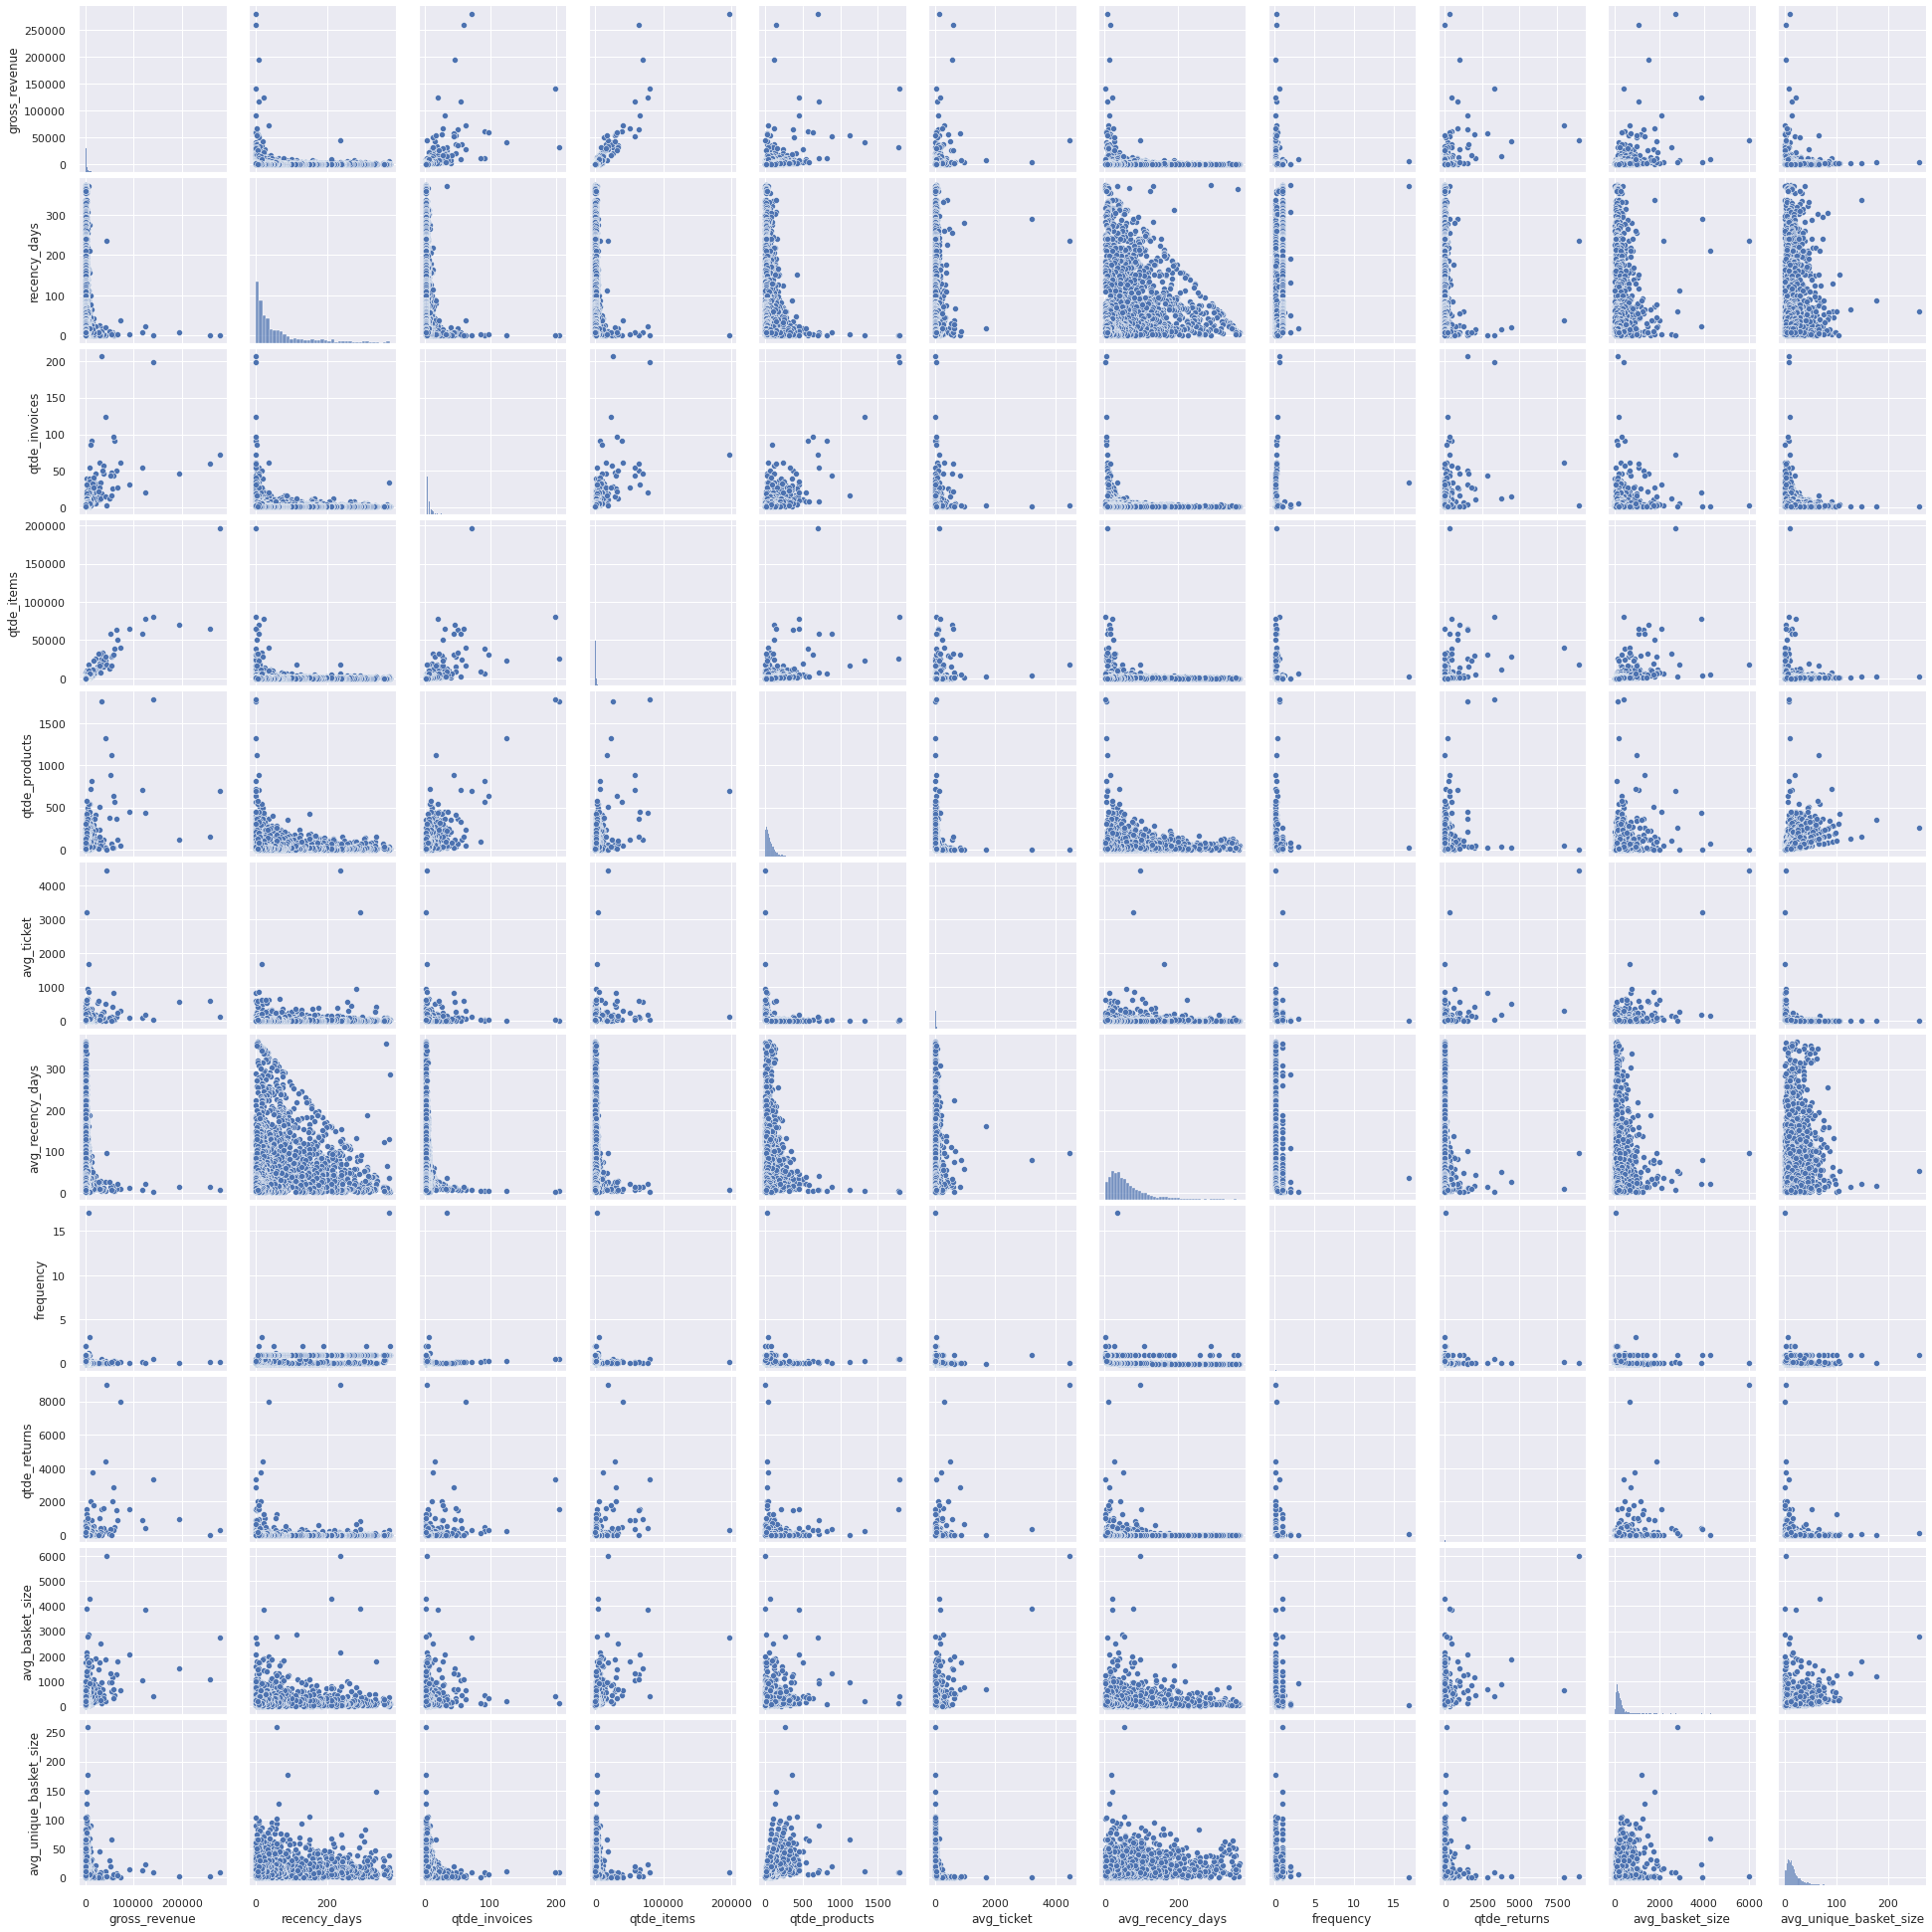

In [210]:
plt.figure(figsize=(25, 14))
aux = df5.drop('customer_id', axis=1)
sns.pairplot(aux);

## 5.3 - Estudo do espaço

In [94]:
df53 = df5.drop('customer_id', axis=1).copy()

mms = MinMaxScaler()

for i in df53.columns:
    df53[i] = mms.fit_transform(df53[[i]])
    
X = df53.copy()

### 5.3.1 - PCA

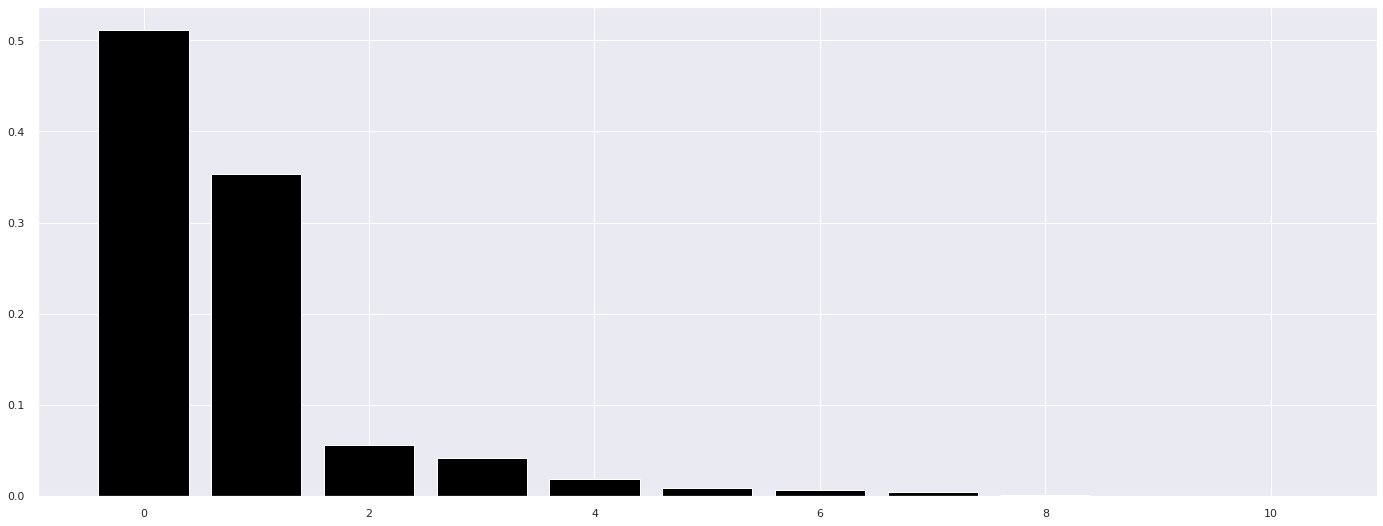

In [96]:
pca = decomposition.PCA(n_components=X.shape[1])

principal_components = pca.fit_transform(X)

# Plot explain variable
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')

df_pca = pd.DataFrame(principal_components)

In [97]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.856516,-0.026032,0.058571,0.136166,-0.034023,-0.110285,0.942806,-0.203492,0.006683,-0.001457,-0.000860
1,-0.011288,-0.113728,-0.006809,0.014810,-0.012514,0.006714,-0.005517,-0.000364,0.002563,-0.000307,0.000077
2,-0.155381,-0.143720,-0.009171,0.043076,-0.009044,0.000642,0.002460,0.008701,-0.005278,0.002083,-0.000154
3,0.076538,0.078368,-0.042452,0.033928,-0.009783,0.002155,-0.005597,0.002594,0.000611,-0.000596,-0.000213
4,0.735211,-0.081840,-0.023783,0.051071,-0.014401,0.011164,-0.027873,0.002735,0.002571,-0.002629,-0.003493


<AxesSubplot:xlabel='0', ylabel='1'>

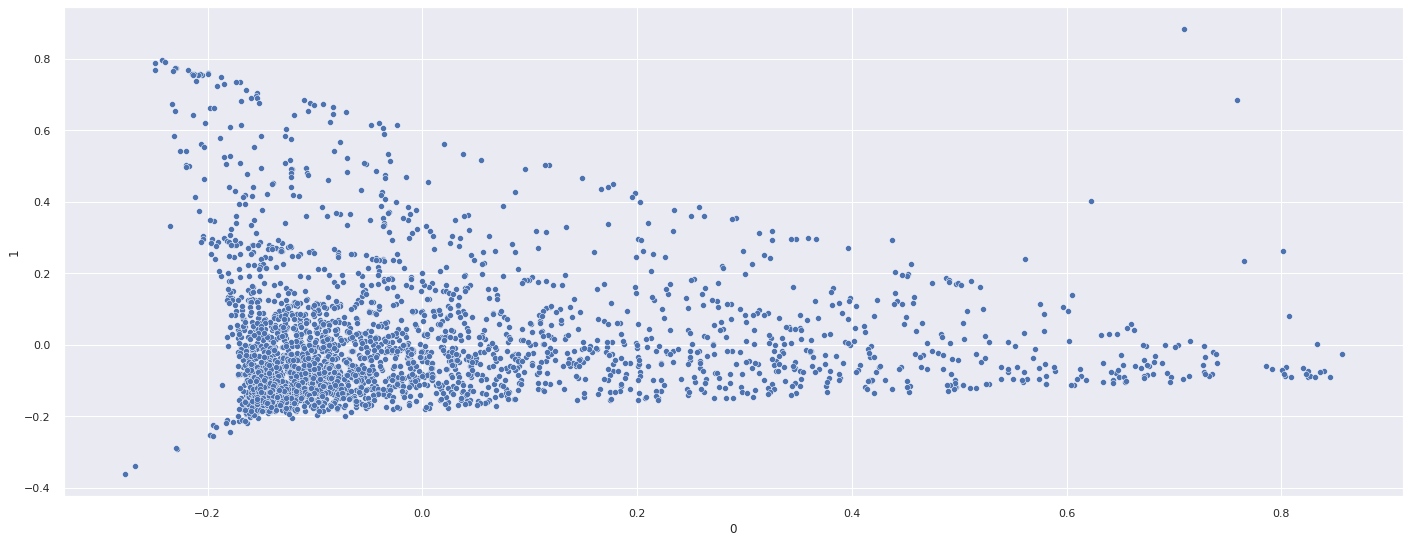

In [98]:
sns.scatterplot(x=0, y=1, data=df_pca)

###  5.3.2 - UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

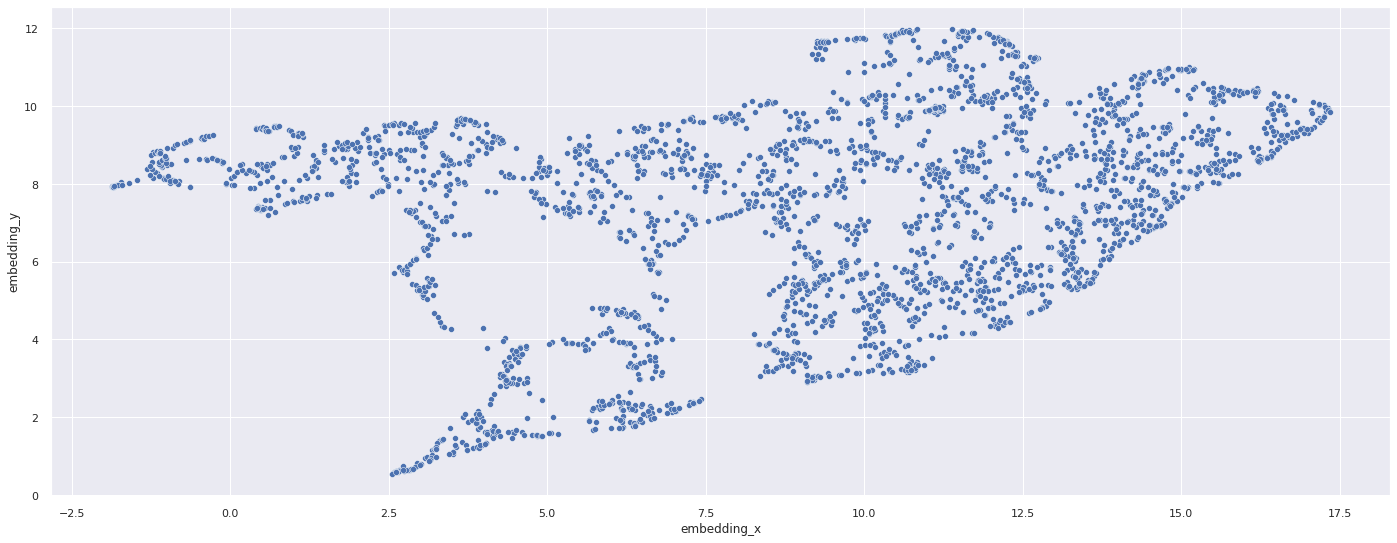

In [100]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# Plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_pca)

### 5.3.3 - t-SNE

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

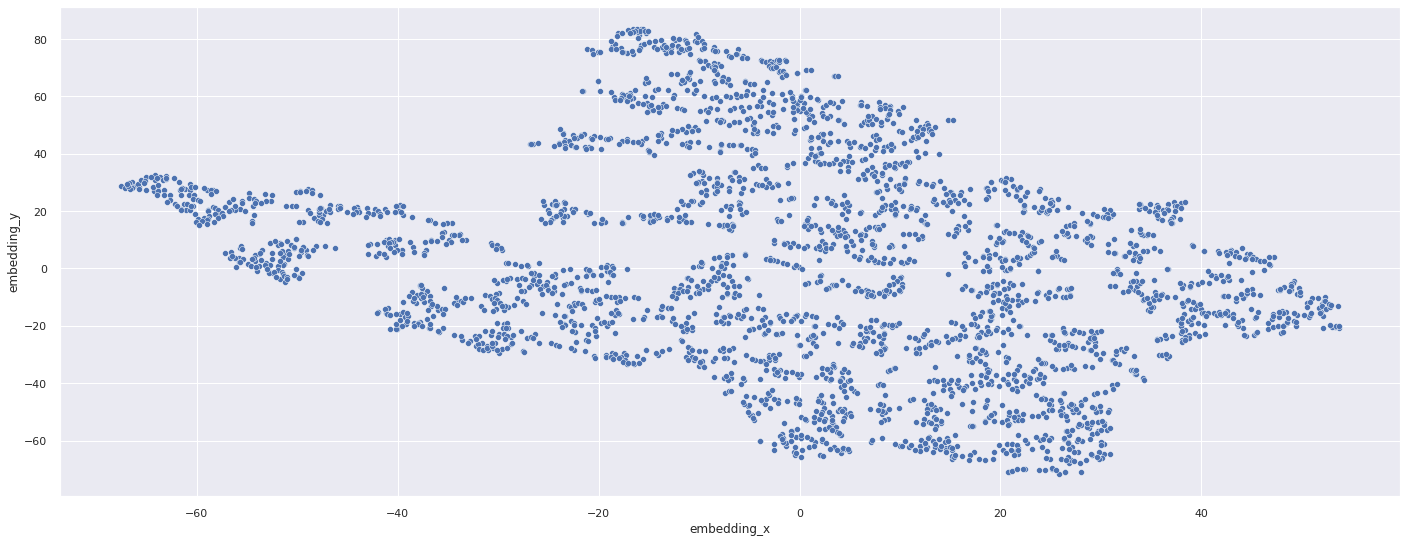

In [101]:
reducer = TSNE(n_components=2, n_jobs=-1, random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# Plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_pca)

### 5.3.4 - Tree-Based Embedding

In [106]:
# Dataset de treino e teste
X = df5.drop(['customer_id', 'gross_revenue'], axis=1)
y = df5['gross_revenue']

# Modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit
rf_model.fit(X, y)

# Dataframe das folhas
df_leaf = pd.DataFrame(rf_model.apply(X))

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

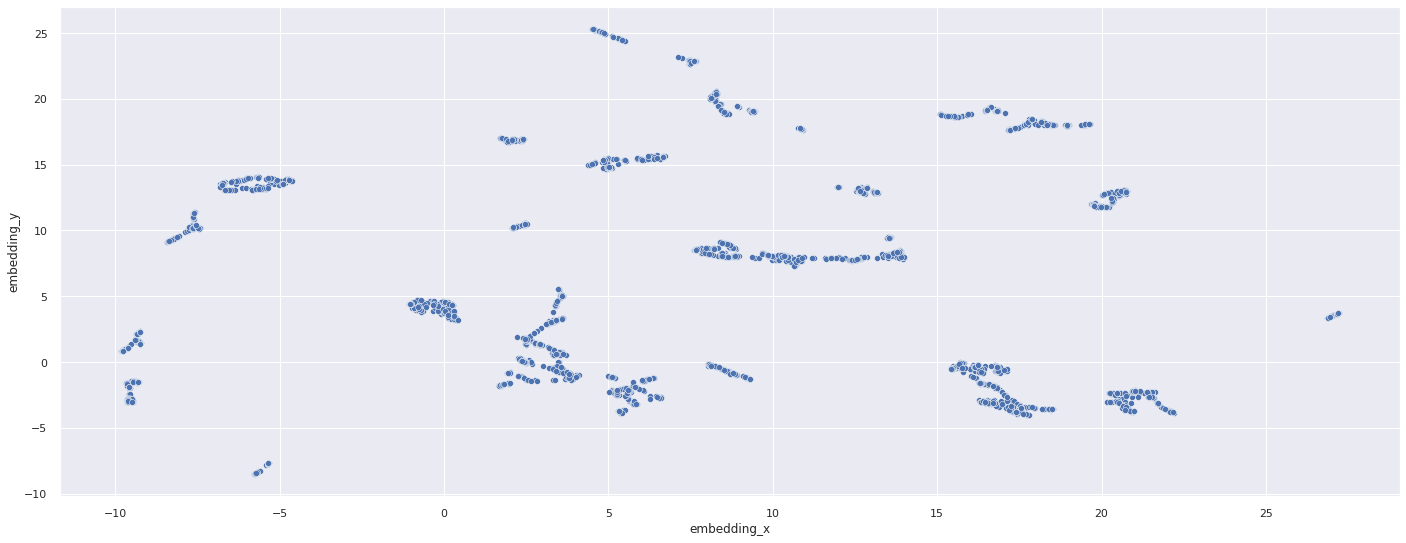

In [108]:
# Reduzir a dimensionalidade
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leaf)

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# Plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_pca)

# 6 - Preparação dos dados

In [216]:
df6 = df5.copy()

In [217]:
ss = MinMaxScaler()

df6['gross_revenue'] = ss.fit_transform(df6[['gross_revenue']])
df6['recency_days'] = ss.fit_transform(df6[['recency_days']])
df6['qtde_invoices'] = ss.fit_transform(df6[['qtde_invoices']])
df6['qtde_items'] = ss.fit_transform(df6[['qtde_items']])
df6['qtde_products'] = ss.fit_transform(df6[['qtde_products']])
df6['avg_ticket'] = ss.fit_transform(df6[['avg_ticket']])
df6['avg_recency_days'] = ss.fit_transform(df6[['avg_recency_days']])
df6['frequency'] = ss.fit_transform(df6[['frequency']])
df6['qtde_returns'] = ss.fit_transform(df6[['qtde_returns']])
df6['avg_basket_size'] = ss.fit_transform(df6[['avg_basket_size']])
df6['avg_unique_basket_size'] = ss.fit_transform(df6[['avg_unique_basket_size']])

# 7 - Seleção de features

In [218]:
df7 = df6.drop('customer_id', axis=1)

In [219]:
df7.head()

,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,0.019292,0.997319,0.160976,0.008799,0.011204,0.003595,0.094521,1.000000,0.004438,0.008317,0.001614
1,0.011559,0.150134,0.039024,0.007056,0.058263,0.003764,0.071918,0.001345,0.003883,0.025539,0.044307
2,0.024000,0.005362,0.068293,0.025538,0.063305,0.006010,0.060788,0.002052,0.005547,0.055623,0.028594
3,0.003375,0.254692,0.019512,0.002225,0.012885,0.007125,0.251142,0.000734,0.000000,0.014447,0.017774
4,0.003116,0.892761,0.009756,0.000401,0.000000,0.065116,0.020822,0.003985,0.002441,0.004272,0.000515


# 8 - Fine Tunning

In [220]:
X = df7.copy()

In [221]:
clusters = [2, 3, 4, 5, 6, 7]

## 8.1 - Within-Cluster Sum of Score (WSS)

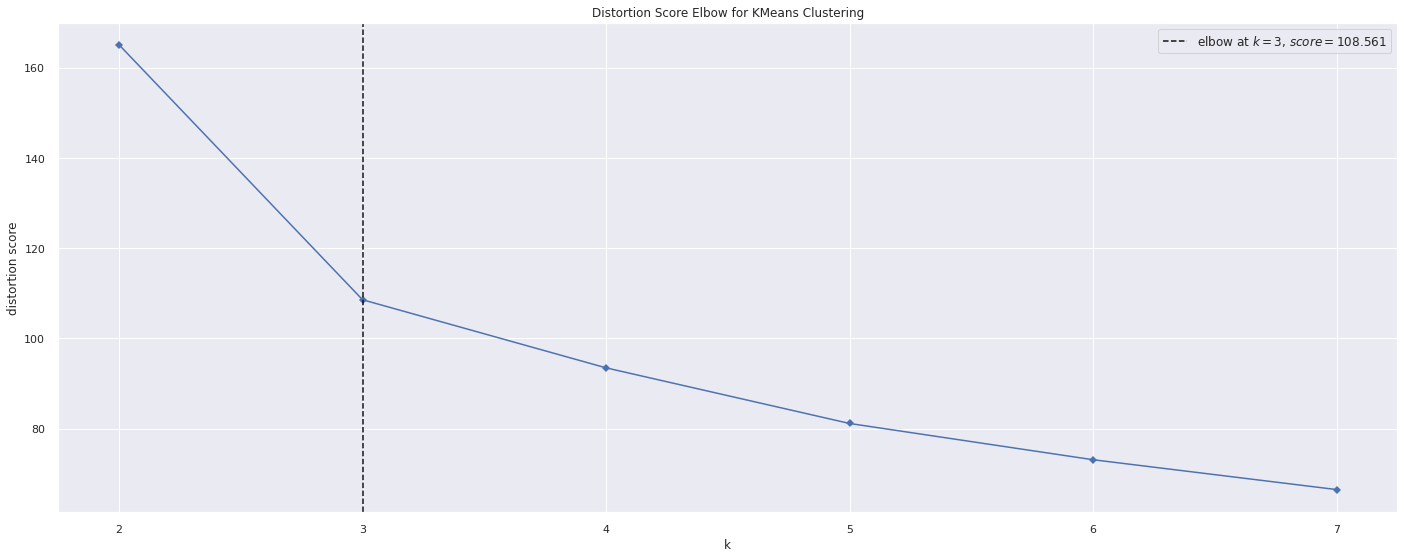

In [222]:
kmeans = KElbowVisualizer(KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

## 8.2 - Silhouette Score

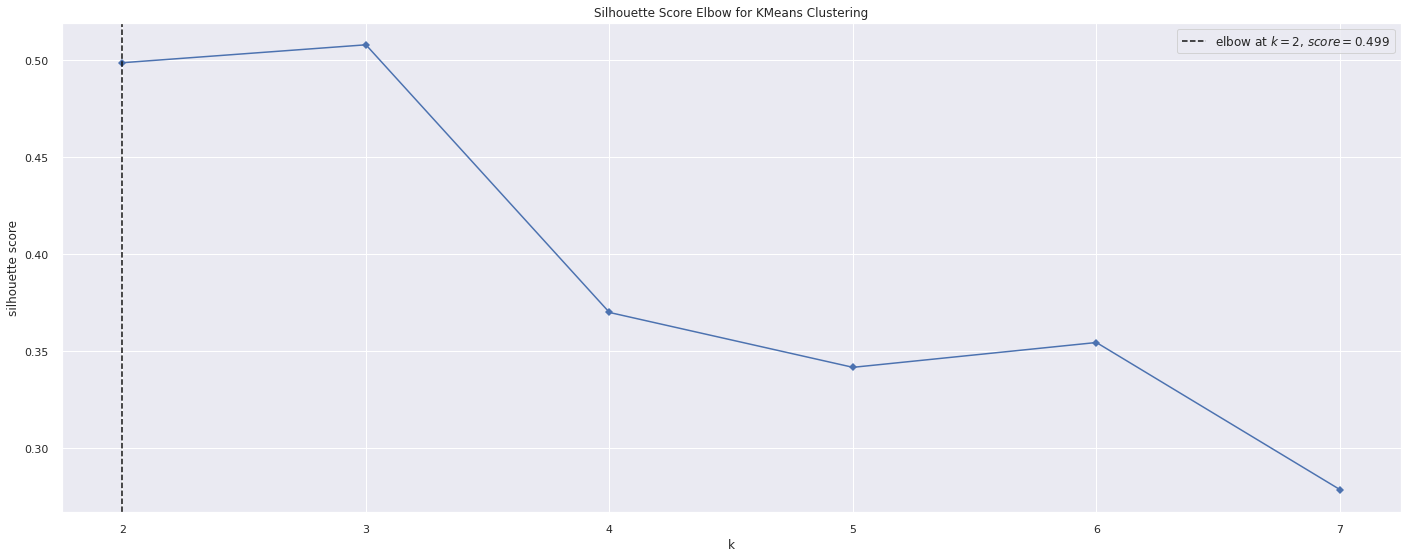

In [223]:
kmeans = KElbowVisualizer(KMeans(), k=clusters, timings=False, metric='silhouette')
kmeans.fit(X)
kmeans.show();

## 8.3 - Análise da Silhoutte

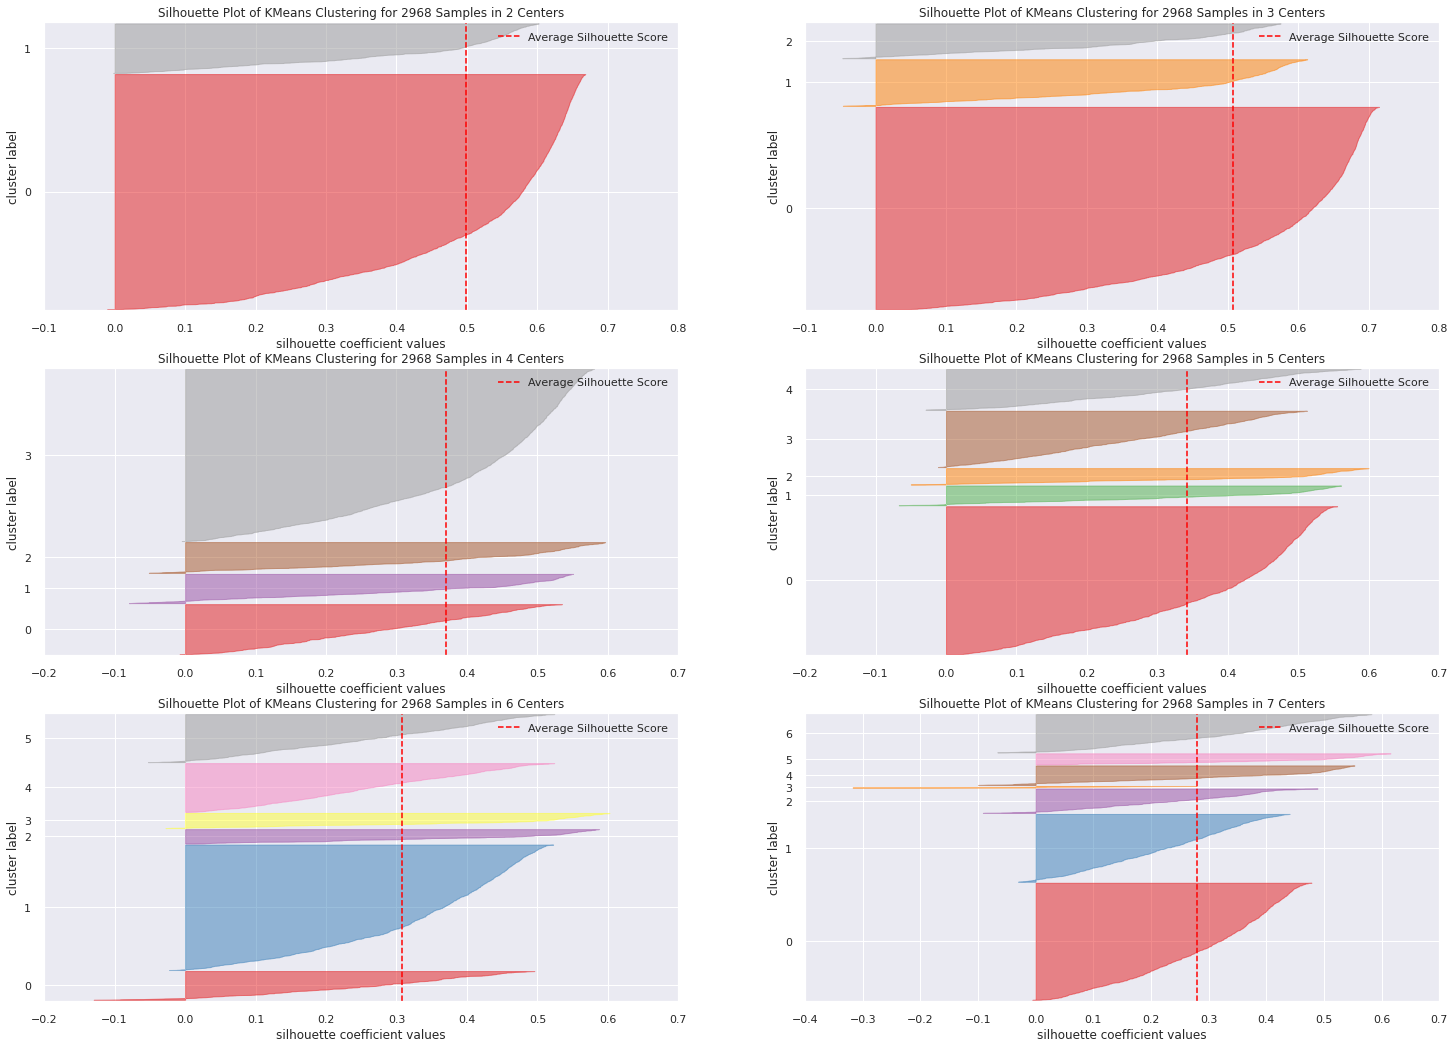

In [224]:
fig, ax = plt.subplots(3, 2, figsize=(25, 18))

for k in clusters:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    vizualizer = SilhouetteVisualizer(km, color='yellowbricks', ax=ax[q-1][mod])
    vizualizer.fit(X)
    vizualizer.finalize()

# 9 - Model Training

In [141]:
# Definição do modelo
k = 3
kmeans = KMeans(init='random', n_clusters=k, n_init=10, random_state=42)

# Treinamento do modelo
kmeans.fit(X)

# clustering
labels = kmeans.labels_

In [142]:
print(f'Valor do WSS: {kmeans.inertia_}')
print('Valor do SS: {}'.format(silhouette_score(X, labels, metric='euclidean')))

Valor do WSS: 9423.021514742908
Valor do SS: 0.5885387705149023


# 10 - Análise do cluster

In [143]:
df9 = df5.copy()
df9['cluster'] = labels

In [144]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5391.21,372.0,34.0,18.152222,1
1,13047,3237.54,31.0,10.0,18.822907,2
2,12583,7281.38,2.0,15.0,29.479271,2
3,13748,948.25,95.0,5.0,33.866071,2
4,15100,876.00,333.0,3.0,292.000000,1


## 10.1 - Vizualização de inspeção

In [145]:
df9.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'invoice_no',
       'avg_ticket', 'cluster'],
      dtype='object')

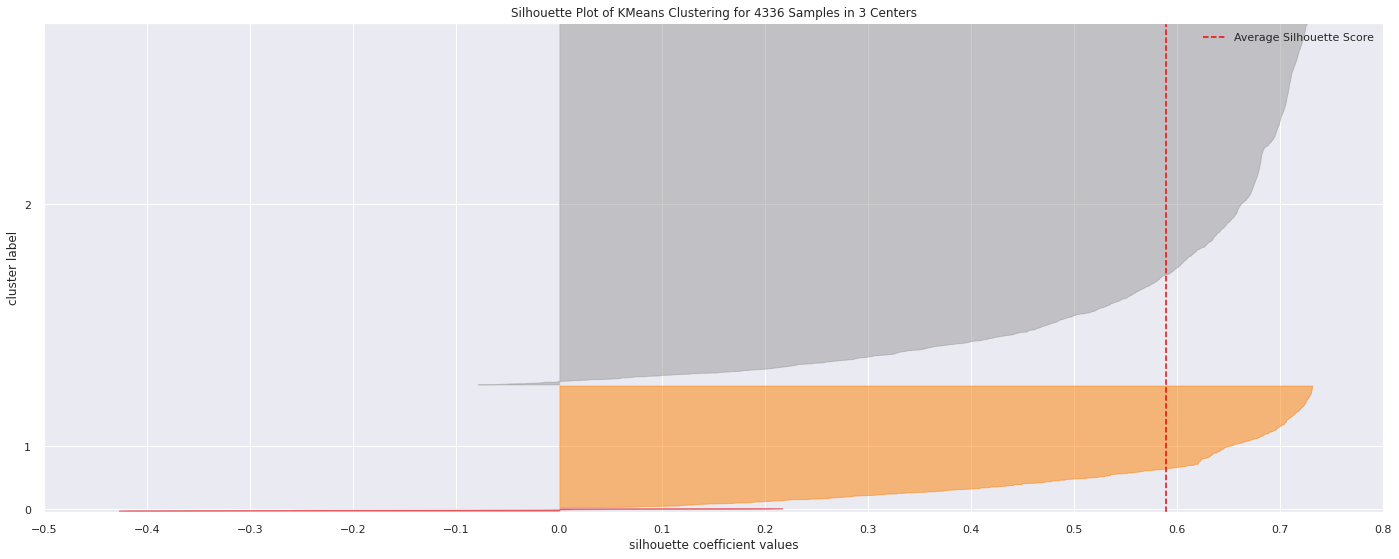

In [146]:
vizualizer = SilhouetteVisualizer(kmeans, color='yellowbricks')
vizualizer.fit(X)
vizualizer.finalize()

## 10.2 - 2d plot

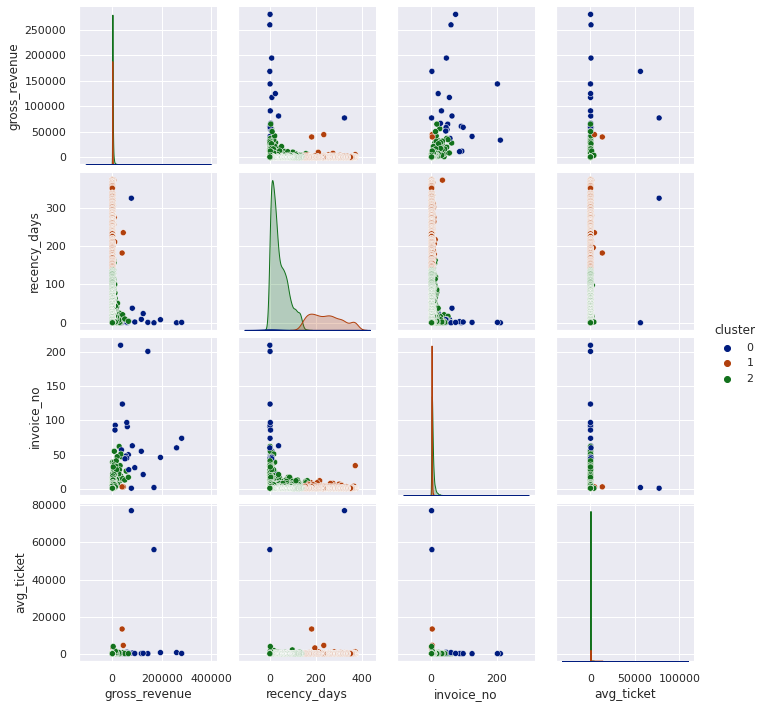

In [147]:
df_viz = df9.drop('customer_id', axis=1)
sns.pairplot(df_viz, hue='cluster', palette='dark');

## 10.3 - Umap

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

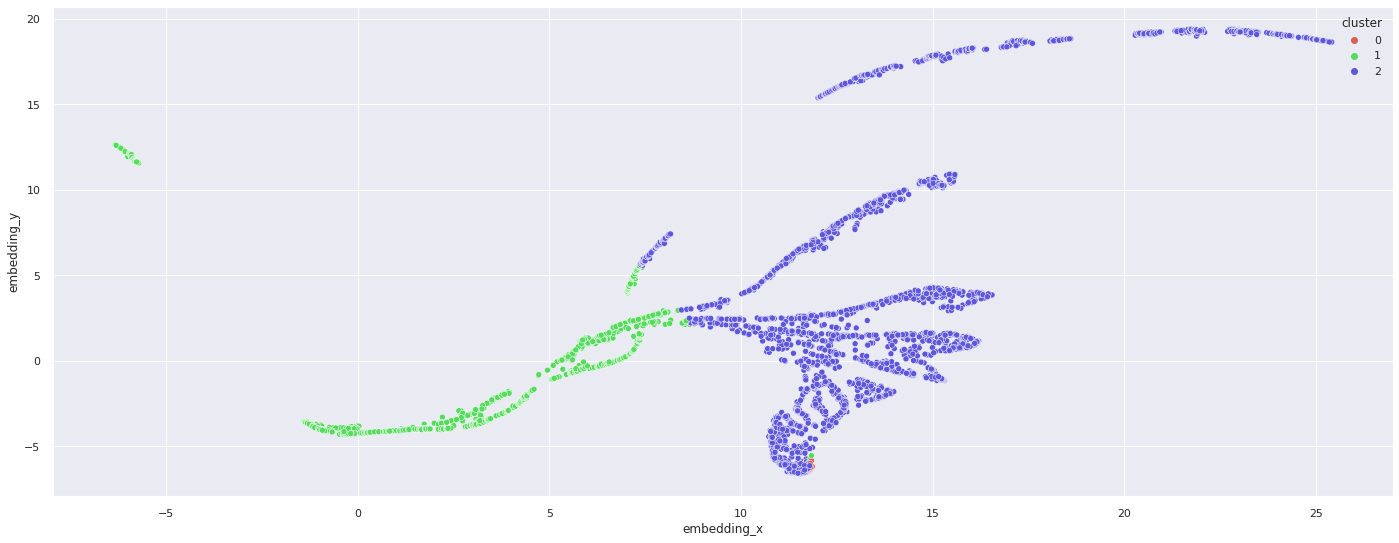

In [149]:
reducer = umap.UMAP(n_neighbors=90, random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# Plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_viz, hue='cluster', palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())))

## 10.4 - Perfil do cluster

In [ ]:
df9.head()

In [61]:
# Número de customers
df_cluster = df9.groupby('cluster', as_index=False)['customer_id'].count()
df_cluster['percent_customer'] = (df_cluster['customer_id']/df_cluster['customer_id'].sum()) *100
df_cluster.rename(columns={'customer_id':'customers'}, inplace=True)

# Média do gross_revenue
df_gross_revenue = df9.groupby('cluster', as_index=False)['gross_revenue'].mean()
df_cluster = pd.merge(df_cluster, df_gross_revenue, on='cluster', how='inner')

# Média do recency_days
df_recency_days = df9.groupby('cluster', as_index=False)['recency_days'].mean()
df_cluster = pd.merge(df_cluster, df_recency_days, on='cluster', how='inner')

# Média do invoice_no
df_invoice_no = df9.groupby('cluster', as_index=False)['invoice_no'].mean()
df_cluster = pd.merge(df_cluster, df_invoice_no, on='cluster', how='inner')

# Média do ticket médio
df_ticket = df9.groupby('cluster', as_index=False)['avg_ticket'].mean()
df_cluster = pd.merge(df_cluster, df_ticket, on='cluster', how='inner')

df_cluster

,cluster,customers,percent_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,4071,93.12,946.70,96.97,3.64,25.36
1,1,6,0.14,182181.98,7.17,89.00,253.63
2,2,28,0.64,42614.39,6.18,57.82,162.86
3,3,267,6.11,8089.03,20.28,19.53,62.78


### Cluster 1 (Candidatos Insiders)

- Número de customers: 6 (0.14% do customers )
- Recência em média: 7 dias
- Compras em média: 89 compras
- Receita em média: $182.182,00 dólares

### Cluster 2

- Número de customers: 31 (0.71 do customers )
- Recência em média: 14 dias
- Compras em média: 53 compras
- Receita em média: $40.543,52 dólares

### Cluster 3

- Número de customers: 4.335 (99% do customers )
- Recência em média: 92 dias
- Compras em média: 5 compras
- Receita em média: $1.372,57 dólares

# 11 - Tradução e interpretação do erro

## 10.1 - Business Perfomance

## 10.2 - Total Perfomance

## 10.3 - Machine Learning Perfomance